<a href="https://colab.research.google.com/github/ptejaswi528/decisiontree/blob/main/decisiontree_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df=sns.load_dataset('titanic')


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df=df[["survived","pclass","sex","age","fare","embarked"]]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [ ]:
df["age"].fillna(df["age"].median())
df["embarked"].fillna(df["embarked"].mode()[0])

,embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [ ]:
#label encoder for sex and embarked
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["embarked"]=le.fit_transform(df["embarked"])
df.head()

/tmp/ipython-input-2192263320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"]=le.fit_transform(df["sex"])
/tmp/ipython-input-2192263320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embarked"]=le.fit_transform(df["embarked"])


,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [ ]:
x=df.drop("survived",axis=1)
y=df["survived"]
x.head(),y.head()

(   pclass  sex   age     fare  embarked
 0       3    1  22.0   7.2500         2
 1       1    0  38.0  71.2833         0
 2       3    0  26.0   7.9250         2
 3       1    0  35.0  53.1000         2
 4       3    1  35.0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [ ]:
model=DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)
model.fit(x,y)

DecisionTreeClassifier(max_depth=4, random_state=42)

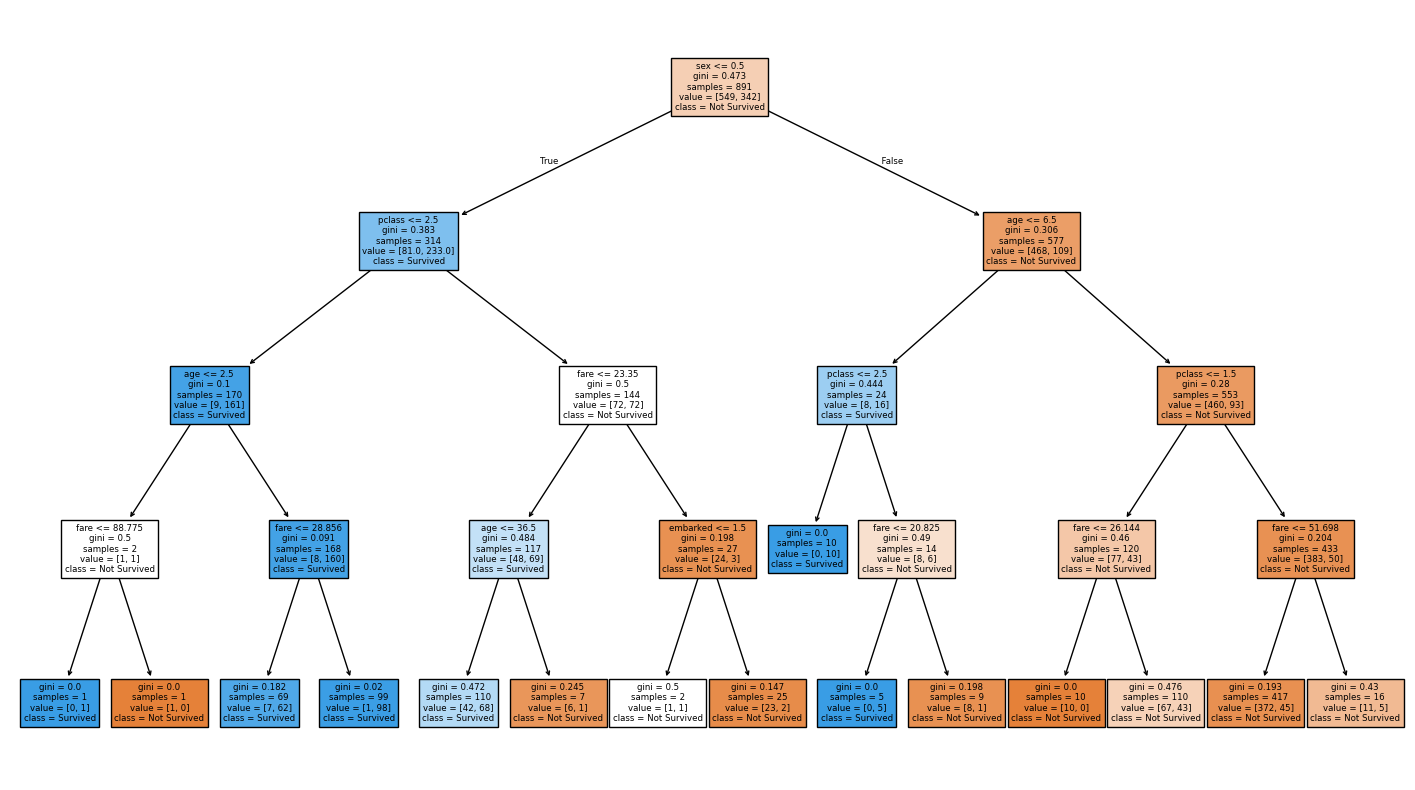

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.show()

In [ ]:
new_passenger=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
prediction=model.predict(new_passenger)
print(prediction)

[0]


In [ ]:
if prediction[0]==1:
    print("Passenger is likely to survive")
else:
    print("Passenger is likely not to survive")

Passenger is likely not to survive
